In [1]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.12


In [2]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()
#service = QiskitRuntimeService(channel='ibm_quantum')
#backend = service.backend(name='ibm_brisbane')
#service.saved_accounts()

In [3]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit_aer import AerSimulator



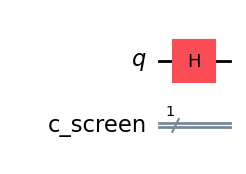

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)
# your code here

double_slit.h(0)

# end of your code
double_slit.draw('mpl')

In [5]:
# Submit your answer using the following code
#grade_lab1_ex1_1(double_slit)

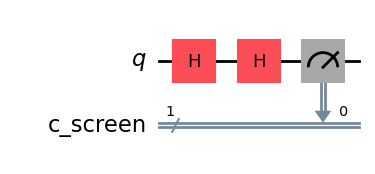

In [6]:
double_slit.h(0)
double_slit.measure(0,0)
double_slit.draw('mpl')

In [7]:
#grade_lab1_ex1_2(double_slit)

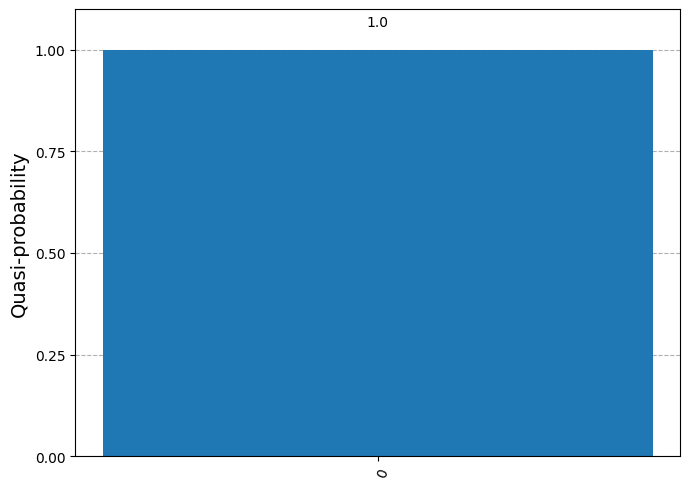

In [8]:
# use simulator
#backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

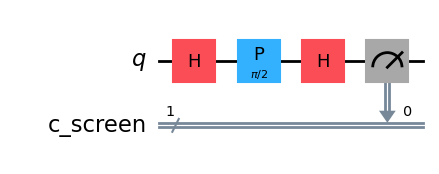

In [9]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

#your code here

double_slit_with_difference.p(np.pi/2,0)
#end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')

In [10]:
# Submit your answer using the following code
#grade_lab1_ex1_3(double_slit_with_difference)

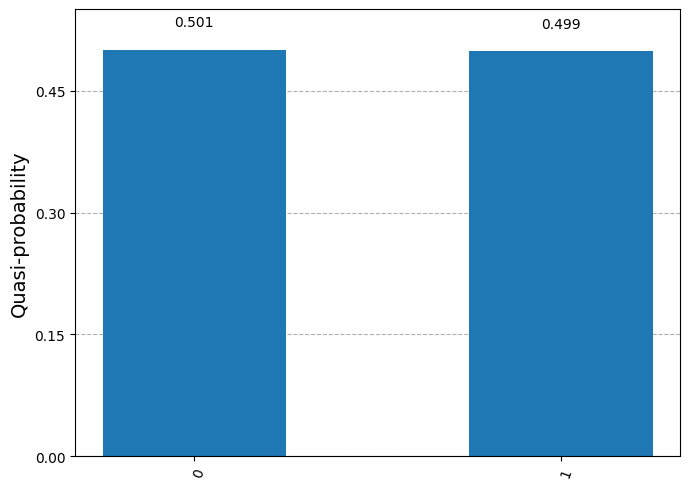

In [11]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

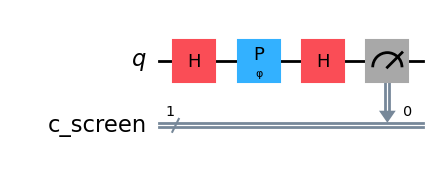

In [12]:
φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

#your code here
double_slit_fringe.h(0)
double_slit_fringe.p(φ,0)
#end of your code
double_slit_fringe.h(0)
double_slit_fringe.measure(qr, cr)
double_slit_fringe.draw('mpl')

In [13]:
#grade_lab1_ex1_4(double_slit_fringe)

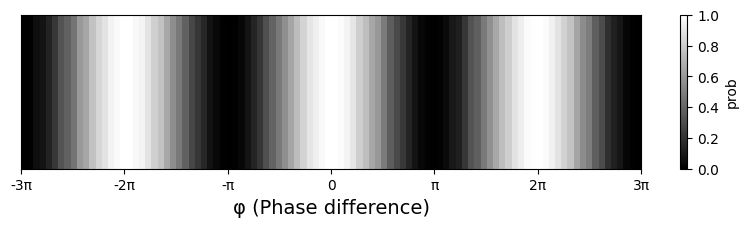

In [14]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [15]:
def schrodingers_cat_experiment_theta(theta):
    
    qc = QuantumCircuit(1)
    
    #your code start here

    #qc.h(0)
    #for i in np.arange(0,2*np.pi+0.2,0.1):
    qc.rx(theta,0)
    #qc.h(0)
    
    #end of your code

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1 
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [16]:
# Submit your answer using the following code
#grade_lab1_ex2(schrodingers_cat_experiment_theta)

In [17]:
happy_img = Image.open('happy.png')
grumpy_img = Image.open('grumpy.png')

out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)
        
        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

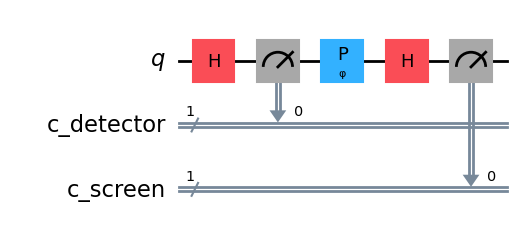

In [18]:
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

#your code here
double_slit_with_detector.h(0)
double_slit_with_detector.measure(qr, cr1)
double_slit_with_detector.p(φ, 0)
double_slit_with_detector.h(0)
double_slit_with_detector.measure(qr, cr2)
#end of your code

double_slit_with_detector.draw('mpl')

In [19]:
# Submit your answer using the following code
#grade_lab1_ex3(double_slit_with_detector)

In [20]:
def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 qubits, 2 classical bits

    # ---- TODO : Task 1 ---
    # Implement the gates to create the Bell state |Φ+> = (|00> + |11>)/sqrt(2).
    qc.h(0)
    qc.cx(0,1)


    # --- End of TODO ---
    qc.barrier()
    # Step 2a: Alice's measurement basis (X if x=1, Z if x=0)
    if x == 1:
        qc.h(0) # H for X-basis measurement

    ##  --- TODO: Task 2 ----
    # Step 2b: Bob's measurement basis
    if y == 0:
        qc.ry(-np.pi/4,1)
    elif y == 1:
        qc.ry(np.pi/4,1)


    
    # --- End of TODO ---
    qc.barrier()
    
    # Step 3: Measure
    qc.measure([0, 1], [0, 1]) # q0 to c0 (Alice), q1 to c1 (Bob) -> 'ba' format

    return qc

In [21]:
# Submit your answer using the following code
#grade_lab1_ex4(create_chsh_circuit)

Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


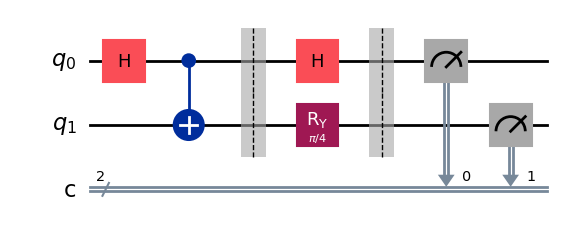

In [22]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 425, '01': 68, '10': 78, '11': 453}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 444, '01': 77, '10': 74, '11': 429}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 441, '01': 68, '10': 77, '11': 438}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 70, '01': 440, '10': 447, '11': 67}

Plotting results...


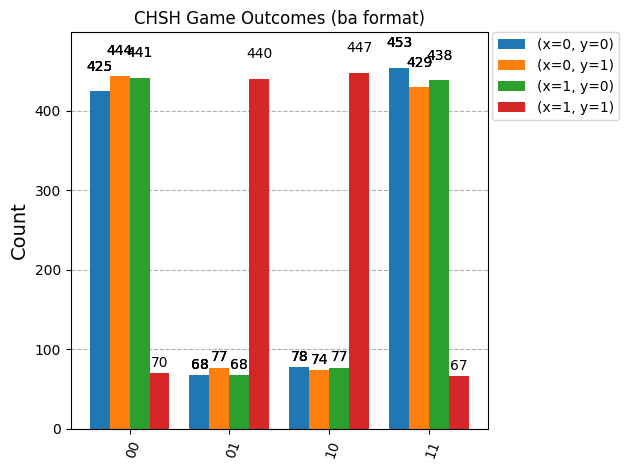

In [23]:
# AerSimulator (if not already defined)
#backend = AerSimulator()
# Pass manager (if not already defined)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [24]:
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- TODO : Task 1 ---
    # Target (a XOR b) value for winning
    

   # x_AND_y = x & y
    #a_XOR_b = [z for z in ['00', '01', '10', '11'] if int(z[0])^int(z[1]) == x_AND_y]

    # --- End of TODO --
    #target_xor_result = x_AND_y
    target_xor_result = x * y
    wins_for_this_case = 0

    # ---- TODO : Task 2 ---
    # Calculate the total number of shots that satisfy the winning condition determined above. Check the 'target_xor_result'

    #if x_AND_y == a_XOR_b:
        #wins_for_this_case += counts
    for outcome, count in counts.items():
        a = int(outcome[0])
        b = int(outcome[1])
        if a ^ b == target_xor_result:
            wins_for_this_case += count
    # --- End of TODO --

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01: # Allow for small simulation variance
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 : # Could be noise or minor error
     print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
     print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8574
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8525
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8584
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8662

--- Overall Performance ---
Experimental Average Win Probability: 0.8586
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8586) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [25]:
#grade_lab1_ex5(counts_list, avg_win_prob)

Full Teleportation Circuit (Check your Exercises 1, 2, 3):


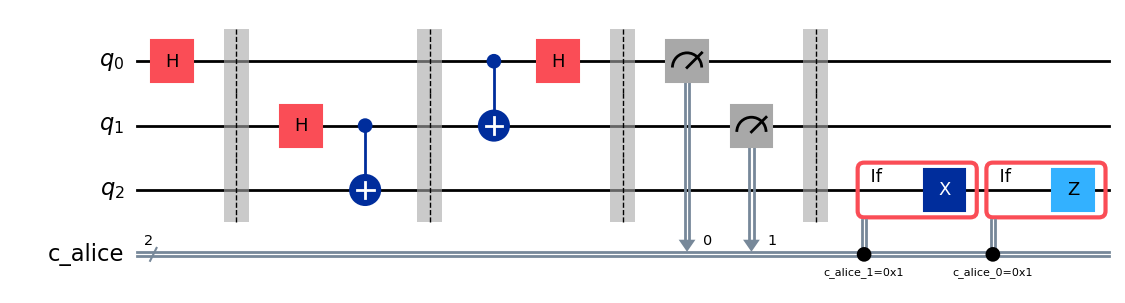

In [26]:
# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# For verification with statevector, we don't measure Bob's final qubit in this circuit.
# If we were to run on hardware and verify by counts, we'd add a classical bit for Bob.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# ---- TODO : Task 1 ---
# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)
teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1],qr_tele[2])

# --- End of TODO --
teleport_qc.barrier()

# ---- TODO : Task 2 ---
# Step 2: Alice's Bell Measurement (gates part))


teleport_qc.cx(qr_tele[0], qr_tele[1])
teleport_qc.h(qr_tele[0])

# --- End of TODO --
teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# ---- TODO : Task 3 ---
# Step 3: Bob's Conditional Corrections on q2

with teleport_qc.if_test((cr_alice_tele[1], 1)):
  teleport_qc.x(2)
with teleport_qc.if_test((cr_alice_tele[0], 1)):
  teleport_qc.z(2)

    
#teleport_qc.measure(2,0)
# --- End of TODO --

print("Full Teleportation Circuit (Check your Exercises 1, 2, 3):")
display(teleport_qc.draw('mpl'))

In [27]:
#grade_lab1_ex6(teleport_qc)

In [28]:
%matplotlib inline

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    display("TODO") #TODO, use plot_bloch_multivector to plot final_state
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

Using statevector simulator...


NameError: name 'AerSimulator' is not defined

In [ ]:
pip install AerSimulator